<div style="text-align: center;">
    <h1 style="text-decoration: underline;">AutoValue: Predicting Car Prices Across Eras</h1>
</div>

### Project Overview: Car Price Prediction
This dataset contains 25,000 rows of car data categorized into Vintage, Modern, and Luxury vehicles. 

Dataset Features:
1) Car_ID → Unique identifier for each car
2) Car_Name → Name of the car model
3) Brand → Manufacturer of the car
4) Year → Manufacturing year
5) Category → Type of car (Vintage, Modern, Luxury)
6) Price → Estimated market price in USD
7) Mileage → Fuel efficiency (MPG or equivalent)
8) Engine_Size → Engine capacity in liters (0 for electric cars)
9) Fuel_Type → Type of fuel used (Petrol, Diesel, Electric, Hybrid)
10) Transmission → Type of transmission (Manual, Automatic, etc.)

### Challenges in this Dataset:
1) Missing Values → Some records have missing price, mileage, or fuel type
2) Inconsistent Categories → Variations in case (e.g., "vintage" vs. "VINTAGE")
3) Outliers → Unrealistic prices and mileage values added randomly
4) Duplicate Entries → 1% of the dataset has duplicate rows
5) Typos in Categorical Data → Fuel type and category may have spelling variations

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Import dataset

In [2]:
df = pd.read_excel("Car dataset.xlsx")
df.head()

,Car_ID,Car_Name,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission
0,1,BMW 3 Series,BMW,1986,Modern,1853.6,3.583,4.8,Hybrid,CVT
1,2,Jaguar E-Type,Jaguar,1979,Vintage,198454.0,33.680,5.5,Electric,Semi-Automatic
2,3,Mercedes-Benz S-Class,Mercedes-Benz,2010,Luxury,291714.0,41.530,4.8,Electric,Semi-Automatic
3,4,Ford Model T,Ford,1969,Vintage,185609.0,19.220,4.1,Electric,Manual
4,5,Mercedes-Benz S-Class,Mercedes-Benz,2013,Luxury,330250.0,16.370,3.8,Diesel,CVT


In [3]:
df.tail()

,Car_ID,Car_Name,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission
25245,18162,Honda Civic,Honda,2002,Modern,16821.0,22.29,2.1,Hybrid,Automatic
25246,1458,Rolls-Royce Silver Cloud,Rolls-Royce,1952,Vintage,134826.0,10.36,3.5,Diesel,Automatic
25247,4557,Toyota Corolla,Toyota,1993,Modern,16464.0,6.12,3.7,Petrol,Automatic
25248,7517,Lexus LS,Lexus,1990,LUXURY,302756.0,41.25,3.4,ELECTRIC,CVT
25249,20976,Tesla Model 3,Tesla,1990,Modern,118076.0,5.47,2.2,Electric,CVT


### Shape of the data

In [4]:
df.shape

(25250, 10)

### Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25250 entries, 0 to 25249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_ID        25250 non-null  int64  
 1   Car_Name      25250 non-null  object 
 2   Brand         25250 non-null  object 
 3   Year          25250 non-null  int64  
 4   Category      25250 non-null  object 
 5   Price         24629 non-null  float64
 6   Mileage       24629 non-null  float64
 7   Engine_Size   25250 non-null  float64
 8   Fuel_Type     24640 non-null  object 
 9   Transmission  25250 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.9+ MB


### Checking data types

In [6]:
# checking for data types

df.dtypes

Car_ID            int64
Car_Name         object
Brand            object
Year              int64
Category         object
Price           float64
Mileage         float64
Engine_Size     float64
Fuel_Type        object
Transmission     object
dtype: object

### Checking null values

In [7]:
# checking for null values

df.isnull().sum()

Car_ID            0
Car_Name          0
Brand             0
Year              0
Category          0
Price           621
Mileage         621
Engine_Size       0
Fuel_Type       610
Transmission      0
dtype: int64

### Treating Null values and inconsistencies

#### Category column

In [8]:
df['Category'].unique()

array(['Modern', 'Vintage', 'Luxury', 'VINTAGE', 'LUXURY', 'vintage',
       'luxury', 'MODERN', 'modern'], dtype=object)

#### Convert all Category into title case to standardize them

In [9]:
df['Category']= df['Category'].str.strip().str.title()

In [10]:
df['Category'].value_counts()

Category
Luxury     8519
Vintage    8482
Modern     8249
Name: count, dtype: int64

#### Mileage column

In [11]:
print(df['Mileage'].isnull().sum())

621


In [12]:
df['Mileage'].value_counts()

Mileage
41.120     16
43.850     16
12.150     15
28.820     15
8.030      15
           ..
143.500     1
1.656       1
3.701       1
15.660      1
98.500      1
Name: count, Length: 4962, dtype: int64

In [13]:
print(df['Mileage'].describe())

count    24629.000000
mean        29.708047
std         31.101287
min          0.515000
25%         15.810000
50%         27.390000
75%         38.970000
max        498.000000
Name: Mileage, dtype: float64


In [14]:
# lets remove extreme outliers

df = df[(df['Mileage']>5) & (df['Mileage']<100)]

In [15]:
# filling missing values

def iqr_median(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1 
    filtered_values = group[(group> Q1-1.5*IQR) & (group<Q3+1.5*IQR)]
    return filtered_values.median()

df['Mileage'] = df.groupby('Category')['Mileage'].transform(lambda x: x.fillna(iqr_median(x)))

In [16]:
print(df['Mileage'].describe())

count    24130.000000
mean        27.476292
std         13.088452
min          5.010000
25%         16.060000
50%         27.430000
75%         38.770000
max         98.500000
Name: Mileage, dtype: float64


In [17]:
print(df['Mileage'].isnull().sum())

0


#### Fuel type column 

In [18]:
print(df['Fuel_Type'].isnull().sum())

299


In [19]:
df['Fuel_Type'].value_counts()

Fuel_Type
Electric    7010
Hybrid      5462
Petrol      5372
Diesel      5282
ELECTRIC     115
PETROL       103
electric      89
petrol        83
HYBRID        83
hybrid        80
DIESEL        78
diesel        74
Name: count, dtype: int64

#### Convert all fuel type into title case to standardize them

In [20]:
df['Fuel_Type'] = df['Fuel_Type'].str.strip().str.title()

In [21]:
df['Fuel_Type'].value_counts()

Fuel_Type
Electric    7214
Hybrid      5625
Petrol      5558
Diesel      5434
Name: count, dtype: int64

In [22]:
print(df['Fuel_Type'].isnull().sum())

299


In [23]:
df['Fuel_Type'].mode()

0    Electric
Name: Fuel_Type, dtype: object

In [24]:
# filling nan value with mode

df["Fuel_Type"] = df.groupby("Category")["Fuel_Type"].transform(lambda x: x.fillna(x.mode()[0]))


In [25]:
print(df['Fuel_Type'].isnull().sum())

0


In [26]:
df['Fuel_Type'].value_counts()

Fuel_Type
Electric    7411
Hybrid      5727
Petrol      5558
Diesel      5434
Name: count, dtype: int64

#### Price column

In [27]:
# we treat price column as target variable so we drop NaN values

df = df.dropna(subset=['Price'])

In [28]:
df['Price'].isnull().sum()

0

In [29]:
df.head(3)

,Car_ID,Car_Name,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission
1,2,Jaguar E-Type,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,Semi-Automatic
2,3,Mercedes-Benz S-Class,Mercedes-Benz,2010,Luxury,291714.0,41.53,4.8,Electric,Semi-Automatic
3,4,Ford Model T,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual


#### Car Name column

In [30]:
print(df['Car_Name'].value_counts())

Car_Name
Mercedes-Benz S-Class       1657
Jaguar E-Type               1641
Bentley Continental GT      1639
Rolls-Royce Silver Cloud    1636
Audi A8                     1627
Volkswagen Beetle           1594
Toyota Corolla              1589
Ford Model T                1586
Porsche Panamera            1579
Lexus LS                    1563
Chevrolet Bel Air           1556
Ford Mustang                1554
Honda Civic                 1549
Tesla Model 3               1546
BMW 3 Series                1525
Name: count, dtype: int64


In [31]:
df['Car_Name']= df['Car_Name'].str.strip().str.title().str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)

In [32]:
df['Car_Name'].str.split()

1                    [Jaguar, EType]
2             [MercedesBenz, SClass]
3                   [Ford, Model, T]
4             [MercedesBenz, SClass]
5                   [Bmw, 3, Series]
                    ...             
25245                 [Honda, Civic]
25246    [RollsRoyce, Silver, Cloud]
25247              [Toyota, Corolla]
25248                    [Lexus, Ls]
25249              [Tesla, Model, 3]
Name: Car_Name, Length: 23841, dtype: object

In [33]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])

In [34]:
df.head(3)

,Car_ID,Car_Name,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission
1,2,Jaguar EType,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,Semi-Automatic
2,3,MercedesBenz SClass,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,Semi-Automatic
3,4,Ford Model T,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual


In [35]:
df['Car_Model']= df['Car_Name'].apply(lambda x: "".join(x.split()[1:]))

In [36]:
df.head(2)

,Car_ID,Car_Name,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model
1,2,Jaguar EType,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,Semi-Automatic,EType
2,3,MercedesBenz SClass,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,Semi-Automatic,SClass


In [37]:
# drop Car_Name column 
df.drop('Car_Name',axis=1,inplace=True)
df.head(2)

,Car_ID,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model
1,2,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,Semi-Automatic,EType
2,3,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,Semi-Automatic,SClass


#### Transmission column

In [38]:
df['Transmission'].unique()

array(['Semi-Automatic', 'Manual', 'CVT', 'Automatic'], dtype=object)

In [39]:
df['Transmission']= df['Transmission'].str.strip().str.replace(r"[^a-zA-Z0-9 ]","",regex=True)

In [40]:
df.head()

,Car_ID,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model
1,2,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,SemiAutomatic,EType
2,3,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,SemiAutomatic,SClass
3,4,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual,ModelT
4,5,MercedesBenz,2013,Luxury,330250.0,16.37,3.8,Diesel,CVT,SClass
5,6,Bmw,1993,Modern,97352.0,35.39,4.6,Diesel,CVT,3Series


## EDA 

#### Mileage vs Price

In [41]:
df['Price'].skew()

2.9956775742017894

#### Observation 

It is >1, so it is highly skewed so we have to transform it into log transformation for better result and better visualization

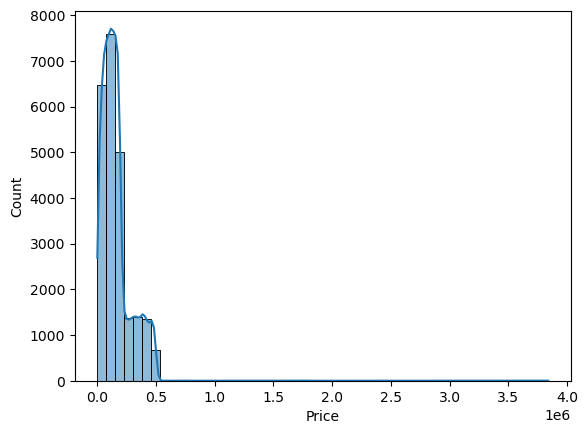

In [42]:
sns.histplot(df['Price'],bins=50,kde=True)
plt.show()

### Observation

1) Most car belongs to low range price 
2) Few cars have high price which causes skewness in dataset

#### Applying log transformation to get normal distribution curve

In [43]:
df['log_price']= np.log1p(df['Price'])

In [44]:
df.head()

,Car_ID,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model,log_price
1,2,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,SemiAutomatic,EType,12.198318
2,3,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,SemiAutomatic,SClass,12.583533
3,4,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual,ModelT,12.131403
4,5,MercedesBenz,2013,Luxury,330250.0,16.37,3.8,Diesel,CVT,SClass,12.707608
5,6,Bmw,1993,Modern,97352.0,35.39,4.6,Diesel,CVT,3Series,11.486099


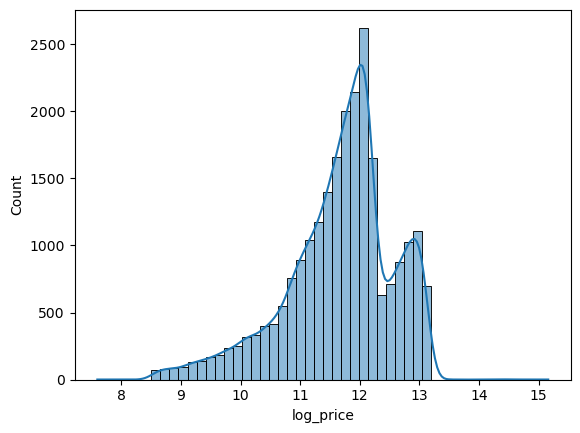

In [45]:
sns.histplot(df['log_price'],bins=50,kde=True)
plt.show()

1) The data is now less skewed as compare to before
2) The transformation compressed extreme high points , making the range more manageable for model building

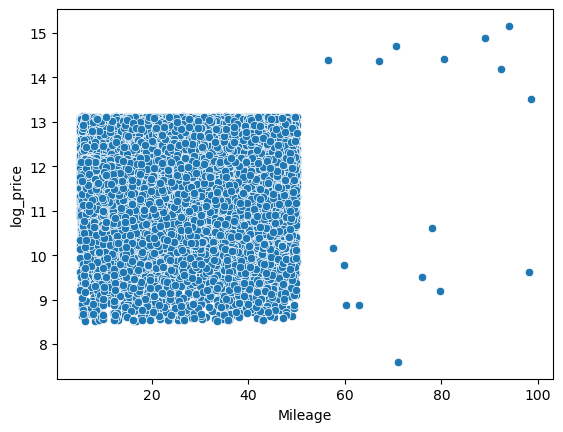

In [46]:
sns.scatterplot(df,x='Mileage',y='log_price')
plt.show()

#### Observation

1) Most of the cars give mileage between 10 to 50
2) Luxury cars have high mileage and high price range

#### Category vs Price

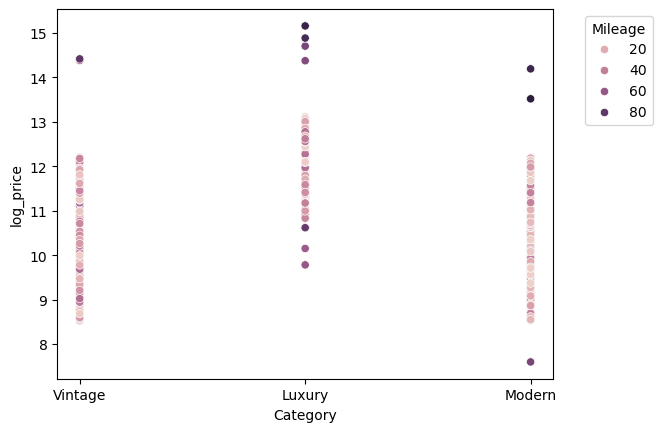

In [47]:
sns.scatterplot(df,x='Category',y='log_price',hue='Mileage')
plt.legend(title="Mileage", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to the right
plt.show()

### Observation

1) Low mileage cars have low price 
2) High mileage cars have high price as compare to other cars
3) Some cars have high mileage but low price but it depends upon manufacutring year or may be specifications

In [48]:
df_numeric = df.corr(numeric_only=True)
df_numeric

,Car_ID,Year,Price,Mileage,Engine_Size,log_price
Car_ID,1.000000,0.007607,0.003554,-0.006818,-0.012644,0.000126
Year,0.007607,1.000000,0.323943,-0.003124,-0.001851,0.282597
Price,0.003554,0.323943,1.000000,0.020222,0.002404,0.846149
Mileage,-0.006818,-0.003124,0.020222,1.000000,0.012871,0.007207
Engine_Size,-0.012644,-0.001851,0.002404,0.012871,1.000000,0.004457
log_price,0.000126,0.282597,0.846149,0.007207,0.004457,1.000000


<Axes: >

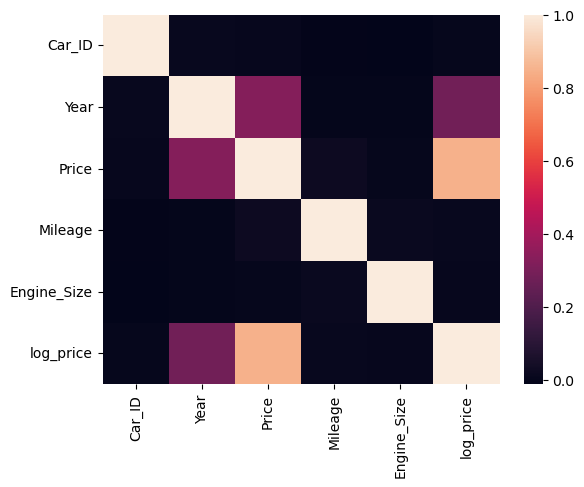

In [49]:
sns.heatmap(df_numeric)

### Observation

1) Since we have very less correlated features so we have to do more work upon feature engineering 

## Adding some feature to get better result

#### 1) Car Age column 

In [50]:
df['Car_age'] = 2025 - df['Year']

In [51]:
df.head(3)

,Car_ID,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model,log_price,Car_age
1,2,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,SemiAutomatic,EType,12.198318,46
2,3,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,SemiAutomatic,SClass,12.583533,15
3,4,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual,ModelT,12.131403,56


#### 2) Mileage per Engine Size

In [52]:
df['Mileage_per_engine_size'] = df['Mileage']/ df['Engine_Size']

In [53]:
df.head(3)

,Car_ID,Brand,Year,Category,Price,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model,log_price,Car_age,Mileage_per_engine_size
1,2,Jaguar,1979,Vintage,198454.0,33.68,5.5,Electric,SemiAutomatic,EType,12.198318,46,6.123636
2,3,MercedesBenz,2010,Luxury,291714.0,41.53,4.8,Electric,SemiAutomatic,SClass,12.583533,15,8.652083
3,4,Ford,1969,Vintage,185609.0,19.22,4.1,Electric,Manual,ModelT,12.131403,56,4.687805


### Data pre-processing steps

In [54]:
#Drop unnecessary columns

df = df.drop(columns=['Car_ID','Price','Year'])


In [55]:
df.head()

,Brand,Category,Mileage,Engine_Size,Fuel_Type,Transmission,Car_Model,log_price,Car_age,Mileage_per_engine_size
1,Jaguar,Vintage,33.68,5.5,Electric,SemiAutomatic,EType,12.198318,46,6.123636
2,MercedesBenz,Luxury,41.53,4.8,Electric,SemiAutomatic,SClass,12.583533,15,8.652083
3,Ford,Vintage,19.22,4.1,Electric,Manual,ModelT,12.131403,56,4.687805
4,MercedesBenz,Luxury,16.37,3.8,Diesel,CVT,SClass,12.707608,12,4.307895
5,Bmw,Modern,35.39,4.6,Diesel,CVT,3Series,11.486099,32,7.693478


In [56]:
categorical_features = ['Car_Model', 'Brand', 'Fuel_Type', 'Transmission', 'Category']
numerical_features = ['Car_age', 'Mileage', 'Engine_Size','Mileage_per_engine_size']
target_variable = 'log_price'

In [57]:
df_num = df.corr(numeric_only=True)
df_num

,Mileage,Engine_Size,log_price,Car_age,Mileage_per_engine_size
Mileage,1.000000,0.012871,0.007207,0.003124,0.544361
Engine_Size,0.012871,1.000000,0.004457,0.001851,-0.647891
log_price,0.007207,0.004457,1.000000,-0.282597,0.000484
Car_age,0.003124,0.001851,-0.282597,1.000000,0.001227
Mileage_per_engine_size,0.544361,-0.647891,0.000484,0.001227,1.000000


<Axes: >

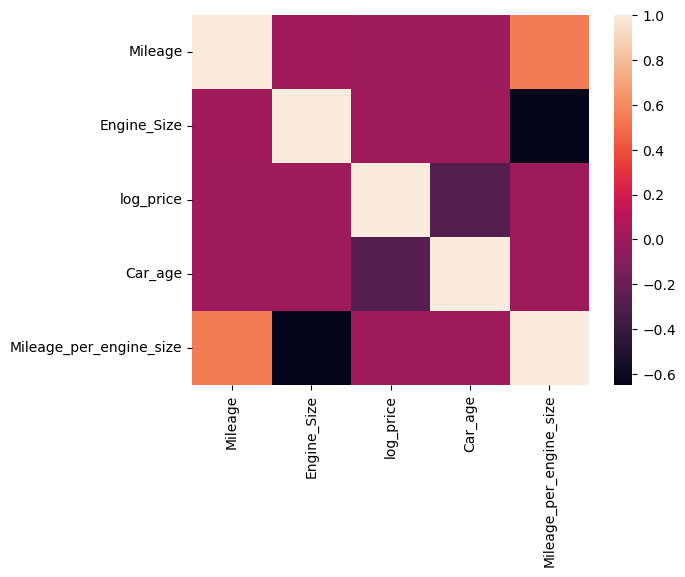

In [58]:
sns.heatmap(df_num)

### Categorical features

In [59]:
print('Unique number of car model is ',df['Car_Model'].nunique())
print('Unique number of Brand is ',df['Brand'].nunique())
print('Unique number of Category is ',df['Category'].nunique())
print('Unique number of Transmission is ',df['Transmission'].nunique())
print('Unique number of Fuel_Type is ',df['Fuel_Type'].nunique())

Unique number of car model is  15
Unique number of Brand is  14
Unique number of Category is  3
Unique number of Transmission is  4
Unique number of Fuel_Type is  4


#### Observation

1) Our categorical value has less than 50 unique values so we can go for get dummies 
2) Get dummies prevent from overfitting also

#### Applying One Hot Encoding

In [60]:
df.columns

Index(['Brand', 'Category', 'Mileage', 'Engine_Size', 'Fuel_Type',
       'Transmission', 'Car_Model', 'log_price', 'Car_age',
       'Mileage_per_engine_size'],
      dtype='object')

In [61]:
df = pd.get_dummies(df,columns=['Brand','Category','Fuel_Type','Transmission','Car_Model'],drop_first=True)
df.head()

,Mileage,Engine_Size,log_price,Car_age,Mileage_per_engine_size,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Car_Model_ContinentalGt,Car_Model_Corolla,Car_Model_EType,Car_Model_Ls,Car_Model_Model3,Car_Model_ModelT,Car_Model_Mustang,Car_Model_Panamera,Car_Model_SClass,Car_Model_SilverCloud
1,33.68,5.5,12.198318,46,6.123636,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,41.53,4.8,12.583533,15,8.652083,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,19.22,4.1,12.131403,56,4.687805,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,16.37,3.8,12.707608,12,4.307895,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,35.39,4.6,11.486099,32,7.693478,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [63]:
df.head(2)

,Mileage,Engine_Size,log_price,Car_age,Mileage_per_engine_size,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Car_Model_ContinentalGt,Car_Model_Corolla,Car_Model_EType,Car_Model_Ls,Car_Model_Model3,Car_Model_ModelT,Car_Model_Mustang,Car_Model_Panamera,Car_Model_SClass,Car_Model_SilverCloud
1,0.473166,1.112773,12.198318,0.109286,-0.447869,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1.072726,0.686974,12.583533,-0.785276,-0.155574,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Model Building 

### Train test split

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['log_price'])
y = df['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of X_train (19072, 39)
shape of X_test (4769, 39)
shape of y_train (19072,)
shape of y_test (4769,)


### Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

print('mean squared error:', mean_squared_error(y_test,y_pred))
print('r2 score:', r2_score(y_test,y_pred))

mean squared error: 0.5438163137984633
r2 score: 0.33463914827113495


### Random forest regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
rf_model = RandomForestRegressor(n_estimators=500,random_state=42)

rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)

print('Random forest r2_score:',r2_rf)
print('Random forest mean squared error:',mse_rf)

Random forest r2_score: 0.2971956888837285
Random forest mean squared error: 0.5744198036296017


### XGBoost

In [70]:
xg_model = XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)

xg_model.fit(X_train,y_train)

y_pred_xg = xg_model.predict(X_test)

r2_xg = r2_score(y_test,y_pred_xg)
mse_xg = mean_squared_error(y_test,y_pred_xg)

print('XGBoost r2_score:',r2_xg)
print('XGBoost mean squared error:',mse_xg)

XGBoost r2_score: 0.3185748498587163
XGBoost mean squared error: 0.5569460726709615


## Hyperparameter tuning

#### To improve our Random Forest and XGBoost models. 

### Grid search Cv

In [76]:
from sklearn.model_selection import GridSearchCV

#### Random Forest

#### This one takes lots of time so alternatively we can use randomizedsearchcv

In [72]:
# # Define the parameter grid
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


# rf = RandomForestRegressor(random_state=42)

# # Perform Grid Search
# rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# rf_grid_search.fit(X_train, y_train)


# print("Best Random Forest Parameters:", rf_grid_search.best_params_)


# best_rf = rf_grid_search.best_estimator_


# y_pred_rf = best_rf.predict(X_test)
# print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
# print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

#### RandomizedsearchCV for Random forest regressor and XGBoost regressor

In [77]:
# for faster performance

from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Define the parameter grid (smaller range)
rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [10, 15],  # Limited depth choices
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}


rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV instead of GridSearchCV
rf_search = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=5, cv=3, scoring='r2', 
    n_jobs=-1, verbose=2, random_state=42
)


rf_search.fit(X_train, y_train)


print("Best Random Forest Parameters:", rf_search.best_params_)

# Train best model
best_rf = rf_search.best_estimator_

# Predict & Evaluate
y_pred_rf = best_rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Random Forest R2 Score: 0.33357636732216966
Random Forest RMSE: 0.5446849516459408


### XGBoost

In [74]:
# Define parameter grid (smaller range for faster search)
xgb_param_grid = {
    'n_estimators': [50, 100],  
    'learning_rate': [0.01, 0.1, 0.2],  # Common values
    'max_depth': [3, 5, 7],  # Avoid very deep trees
    'subsample': [0.7, 0.8, 0.9],  # Sample fraction of data
    'colsample_bytree': [0.7, 0.8, 0.9]  # Feature selection
}

# Initialize XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Use RandomizedSearchCV for faster tuning
xgb_search = RandomizedSearchCV(
    xgb, xgb_param_grid, n_iter=5, cv=3, scoring='r2',
    n_jobs=-1, verbose=2, random_state=42
)


xgb_search.fit(X_train, y_train)


print("Best XGBoost Parameters:", xgb_search.best_params_)


best_xgb = xgb_search.best_estimator_

# Predict & Evaluate
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
XGBoost R2 Score: 0.3306048284713864
XGBoost RMSE: 0.5471136657789454


## Save the Random Forest Model

In [80]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)  

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


## Load the Saved Model in Jupyter Notebook

In [81]:
# Load the saved model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

print("Random Forest model loaded successfully!")

Random Forest model loaded successfully!


## Make Predictions with New Inputs

In [86]:
new_data_dict = {
    'Brand': ['Ford'], 
    'Category': ['Sports'], 
    'Mileage': [20000], 
    'Engine_Size': [5.0], 
    'Fuel_Type': ['Petrol'], 
    'Transmission': ['Manual'], 
    'Car_Model': ['Mustang'],
    'Car_age': [2],
    'Mileage_per_engine_size': [4000]
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Apply the same encoding as training data
new_data_encoded = pd.get_dummies(new_data_df)

# Align columns with training data (to ensure same feature count)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_log_price = loaded_rf.predict(new_data_encoded)

# Convert log price back to normal
predicted_price = np.exp(predicted_log_price)

print("Predicted Car Price in dollars:", predicted_price[0])

Predicted Car Price in dollars: 311639.62400914525
